In [1]:
import pandas as pd
import numpy as np

In [2]:
def generate_random_data_with_none(n_users, m_items, seed=None):
    # 设置随机数生成器的种子
    np.random.seed(seed)
    
    # 生成随机数据
    random_data = np.random.randint(-1, 2, size=(n_users, m_items)).astype(float)
    
    # 为用户1随机一个待推荐的item
    random_item_index = np.random.choice(range(m_items))
    random_data[0, random_item_index] = np.nan
    
    # 创建DataFrame
    df = pd.DataFrame(random_data, columns=[f"Item_{i+1}" for i in range(m_items)], index=[f"User_{i+1}" for i in range(n_users)])
    
    return df, random_item_index


In [3]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    """
    :param R: 用户-物品矩阵
    :param P: 用户特征矩阵
    :param Q: 物品特征矩阵
    :param K: 潜在特征维度
    :param steps: 迭代次数
    :param alpha: 学习速率
    :param beta: 正则化参数
    :return: 迭代后的 P 和 Q
    """
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        if e < 0.001:
            break
    return P, Q.T

def recommend(user_index, R, P, Q, top_k=1):
    """
    :param user_index: 用户索引
    :param R: 用户-物品矩阵
    :param P: 用户特征矩阵
    :param Q: 物品特征矩阵
    :param top_k: 需要推荐的物品数量
    :return: 为用户推荐的物品索引列表
    """
    prediction = np.dot(P[user_index,:], Q.T)
    top_indices = np.argsort(prediction)[::-1][:top_k]
    return top_indices


In [4]:
# 生成随机数据，并得到待推荐的item的索引
n_users = 10
m_items = 10
df, random_item_index = generate_random_data_with_none(n_users, m_items, seed=42)

In [5]:
# 转换为矩阵形式
R = df.values

# 设置潜在特征维度
K = 2

# 初始化用户特征矩阵和物品特征矩阵
P = np.random.rand(n_users,K)
Q = np.random.rand(m_items,K)

# 进行矩阵分解
nP, nQ = matrix_factorization(R, P, Q, K)



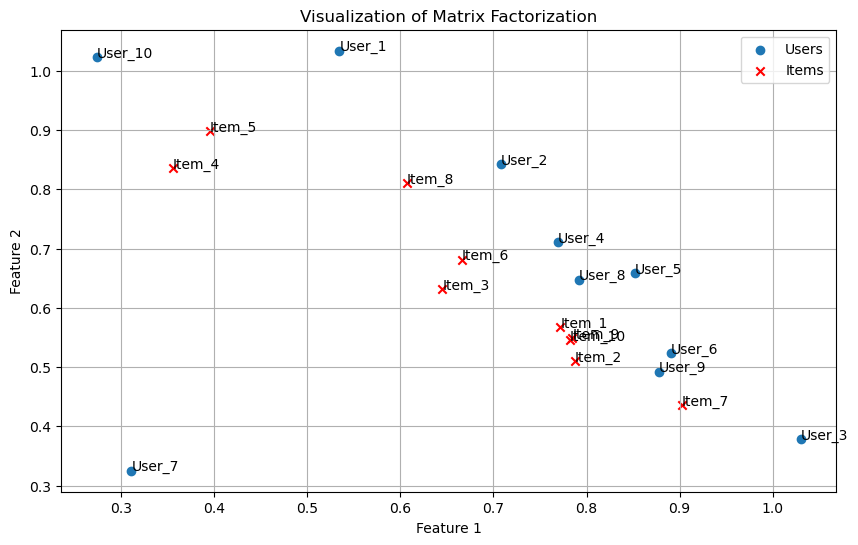

In [6]:
import matplotlib.pyplot as plt

# 绘制用户在二维特征空间的分布
plt.figure(figsize=(10, 6))
plt.scatter(nP[:, 0], nP[:, 1], marker='o', label='Users')

# 标注用户编号
for i, txt in enumerate(df.index):
    plt.annotate(txt, (nP[i, 0], nP[i, 1]))

# 绘制物品在二维特征空间的分布
for i, txt in enumerate(df.columns):
    plt.scatter(nQ[i, 0], nQ[i, 1], marker='x', color='r')
    plt.annotate(txt, (nQ[i, 0], nQ[i, 1]))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Matrix Factorization')
plt.legend(['Users', 'Items'])
plt.grid(True)
plt.show()


In [7]:
# 使用新的 recommend 函数为用户1推荐top 3物品
recommended_items_indices = recommend(0, R, nP, nQ, top_k=3)
print("模型推荐的物品索引:", recommended_items_indices)

模型推荐的物品索引: [7 4 5]
